## Setup

In [ ]:
# mount drive

In [ ]:
!pip uninstall -y matplotlib &>/dev/null
!pip uninstall -y numpy &>/dev/null
!rm -r sample_data

%cd /content
!git clone https://github.com/NVIDIA/flowtron
%cd /content/flowtron
!git submodule update --init; cd tacotron2; git submodule update --init

!pip install https://download.pytorch.org/whl/cu101/torch-1.8.0%2Bcu101-cp37-cp37m-linux_x86_64.whl &>/dev/null
!pip install -r requirements.txt &>/dev/null

!pip install numba==0.48 &>/dev/null
!pip install matplotlib==3.1.3 &>/dev/null

!pip install tensorboardX &>/dev/null
%load_ext tensorboard

/content
Cloning into 'flowtron'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 222 (delta 23), reused 31 (delta 13), pack-reused 174
Receiving objects: 100% (222/222), 2.83 MiB | 10.15 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/flowtron
Submodule 'apex' (https://github.com/NVIDIA/apex) registered for path 'apex'
Submodule 'tacotron2' (https://github.com/NVIDIA/tacotron2) registered for path 'tacotron2'
Cloning into '/content/flowtron/apex'...
Cloning into '/content/flowtron/tacotron2'...
Submodule path 'apex': checked out '9165b27fdf240f9bc08eac98b849a9d7c6308917'
Submodule path 'tacotron2': checked out '6f435f7f29c3e1553cf2dd7ca2daf56903b20c39'
Submodule 'waveglow' (https://github.com/NVIDIA/waveglow) registered for path 'waveglow'
Cloning into '/content/flowtron/tacotron2/waveglow'...
Submodule path 'waveglow': checked out '2fd4e63e2918012f55eac2c8a8e75622a39741b

In [ ]:
# restart runtime

In [ ]:
!cp -r /content/drive/MyDrive/flowtron/audio22k /content/flowtron/audio # data

In [ ]:
!cp /content/drive/MyDrive/flowtron/train.py /content/flowtron/ # custom train script

In [ ]:
!cp /content/drive/MyDrive/flowtron/inference.py /content/flowtron/ # custom inference script

## Training

Using pretrained

In [ ]:
#!cp /content/drive/MyDrive/flowtron/train.py /content/flowtron/
%cd /content/flowtron
!python train.py \
  -c /content/drive/MyDrive/flowtron/config.json \
  -p \
    train_config.optim_algo="RAdam" \
    train_config.ignore_layers=["speaker_embedding.weight"] \
    train_config.checkpoint_path="/content/drive/MyDrive/flowtron/models/flowtron_libritts.pt" \
    train_config.output_directory="/content/drive/MyDrive/flowtron/outdir" \
    train_config.epochs=10 \
    train_config.iters_per_checkpoint=200 \
    train_config.batch_size=2 \
    data_config.training_files="/content/drive/MyDrive/flowtron/filelists/m-ailabs_janeeyre_filelist_train1k.txt" \
    data_config.validation_files="/content/drive/MyDrive/flowtron/filelists/m-ailabs_janeeyre_filelist_val.txt" \
    data_config.sampling_rate=22050

/content/flowtron
train_config.optim_algo=RAdam
train_config.optim_algo:RAdam was not parsed
optim_algo=RAdam
optim_algo:RAdam was not parsed
train_config.ignore_layers=[speaker_embedding.weight]
train_config.ignore_layers:[speaker_embedding.weight] was not parsed
ignore_layers=[speaker_embedding.weight]
ignore_layers:[speaker_embedding.weight] was not parsed
train_config.checkpoint_path=/content/drive/MyDrive/flowtron/models/flowtron_libritts.pt
train_config.checkpoint_path:/content/drive/MyDrive/flowtron/models/flowtron_libritts.pt was not parsed
checkpoint_path=/content/drive/MyDrive/flowtron/models/flowtron_libritts.pt
checkpoint_path:/content/drive/MyDrive/flowtron/models/flowtron_libritts.pt was not parsed
train_config.output_directory=/content/drive/MyDrive/flowtron/outdir
train_config.output_directory:/content/drive/MyDrive/flowtron/outdir was not parsed
output_directory=/content/drive/MyDrive/flowtron/outdir
output_directory:/content/drive/MyDrive/flowtron/outdir was not parse

Fine-tuning

In [ ]:
%cd /content/flowtron
!python train.py \
  -c /content/drive/MyDrive/flowtron/config.json \
  -p \
    train_config.optim_algo="RAdam" \
    train_config.finetune_layers=["speaker_embedding.weight"] \
    train_config.checkpoint_path="/content/drive/MyDrive/flowtron/models/flowtron_libritts2p3k.pt" \
    train_config.output_directory="/content/drive/MyDrive/flowtron/outdir" \
    train_config.epochs=40 \
    train_config.iters_per_checkpoint=200 \
    train_config.batch_size=2 \
    data_config.training_files="/content/drive/MyDrive/flowtron/filelists/m-ailabs_janeeyre_filelist_train50.txt" \
    data_config.validation_files="/content/drive/MyDrive/flowtron/filelists/m-ailabs_janeeyre_filelist_val50.txt" \
    data_config.sampling_rate=22050 \
    model_config.n_speakers=2311

/content/flowtron
train_config.optim_algo=RAdam
train_config.optim_algo:RAdam was not parsed
optim_algo=RAdam
optim_algo:RAdam was not parsed
train_config.finetune_layers=[speaker_embedding.weight]
train_config.finetune_layers:[speaker_embedding.weight] was not parsed
finetune_layers=[speaker_embedding.weight]
finetune_layers:[speaker_embedding.weight] was not parsed
train_config.checkpoint_path=/content/drive/MyDrive/flowtron/models/flowtron_libritts2p3k.pt
train_config.checkpoint_path:/content/drive/MyDrive/flowtron/models/flowtron_libritts2p3k.pt was not parsed
checkpoint_path=/content/drive/MyDrive/flowtron/models/flowtron_libritts2p3k.pt
checkpoint_path:/content/drive/MyDrive/flowtron/models/flowtron_libritts2p3k.pt was not parsed
train_config.output_directory=/content/drive/MyDrive/flowtron/outdir
train_config.output_directory:/content/drive/MyDrive/flowtron/outdir was not parsed
output_directory=/content/drive/MyDrive/flowtron/outdir
output_directory:/content/drive/MyDrive/flowt

## Testing

Inference

/content/flowtron
sid0_sigma0.5.wav


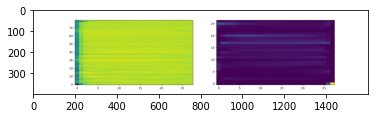

In [ ]:
m = 'model_1200'

%cd /content/flowtron
!python inference.py \
  -f /content/drive/MyDrive/flowtron/outdir/$m \
  -w /content/drive/MyDrive/flowtron/models/waveglow.pt \
  -t "This doesn't work very well." \
  -i 0 \
  -c /content/drive/MyDrive/flowtron/config.json \
  -p \
    data_config.training_files="/content/drive/MyDrive/flowtron/filelists/m-ailabs_janeeyre_filelist_train1k.txt" \
    data_config.validation_files="/content/drive/MyDrive/flowtron/filelists/m-ailabs_janeeyre_filelist_val.txt" \
    data_config.sampling_rate=22050 \
    data_config.use_attn_prior=false \
  &>/dev/null

!mkdir -p /content/out_$m/
!mv /content/flowtron/results/* /content/out_$m/
!rm -r /content/flowtron/results/

import re
import os
from IPython.display import Audio, display
from matplotlib.pyplot import imshow
from matplotlib.image import imread
for w in [ f for f in os.listdir(f'/content/out_{m}') if re.match('^.*\.wav$', f) ]:
  print(w)
  display(Audio(filename=f'/content/out_{m}/{w}', rate=16000))
for p in [ f for f in os.listdir(f'/content/out_{m}') if re.match('^.*\.png$', f) ]:
  imshow(imread(f'/content/out_{m}/{p}'))

Tensorboard

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/flowtron/outdir/logs

UsageError: Line magic function `%tensorboard` not found.


## Nothing

In [ ]:
!rm -r /content/out*

In [ ]:
!rm -r /content/drive/MyDrive/flowtron/outdir

In [ ]:
!rm -r /content/flowtron/audio

In [ ]:
!ls /content/flowtron/audio | wc -l

10055


In [ ]:
import torch

In [ ]:
m = torch.load('/content/drive/MyDrive/flowtron/models/flowtron_libritts2p3k.pt', map_location='cpu')

In [ ]:
type(m['model'])

flowtron.Flowtron